<a href="https://colab.research.google.com/github/haleywis/OPTI556/blob/main/HW3_Wiskoski_Part1and2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **OPTI-556: Computational Imaging**  
# Haley Wiskoski  
Homework #3 - Rays   
Due: Thursday October 7, 2021

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files
from scipy import signal
%matplotlib inline
plt.rcParams['figure.figsize'] = [30, 10]
plt.rcParams.update({'font.size': 22})
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Model
import cv2
from PIL import Image
from keras.datasets import mnist
from progressbar import ProgressBar

## 1) MURA Coded Aperture Imaging

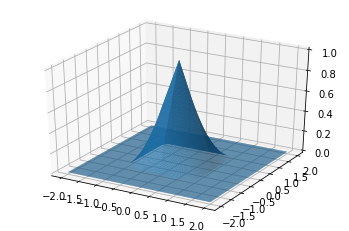

In [2]:
# Creatining the coded aperture sampling function
pixel = np.zeros((128,128))
pixel[(64-32):(64+32),(64-32):(64+32)] = 1
sampFun = signal.convolve2d(pixel,pixel)
sampFun = sampFun/np.max(sampFun)

fig=plt.figure()
ax = plt.gca(projection='3d')
X, Y = np.meshgrid(np.linspace(-2,2,255), np.linspace(-2,2,255))
surf = ax.plot_surface(X, Y, sampFun, rstride=1, cstride=1, antialiased=True, linewidth=0)

In [3]:
# Quadratic Residues Function
def qres(p):
  # function to find the quadratic residues modulo prime number p between 1
  # and p-1. The function returns a list with value 1 for all indices which
  # are quadratic residues modulo p and value 0 for indices which are not
  # quadratic residues.
  qr=np.zeros(p)
  for i in range(1,p):
    qr[np.mod(i**2,p)-1]=1
  return qr

Text(0.5, 0.92, 'Cross Corelation with Decoding Pattern')

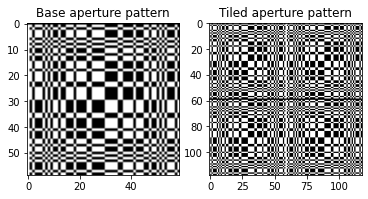

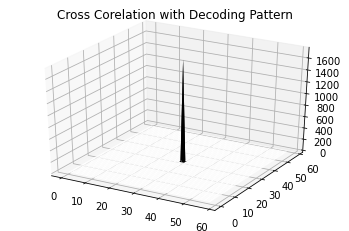

In [4]:
# Creating our 59x59 element MURA Coding Mask
p=59
qr=qres(p)
t=np.zeros((p,p));
t[1:p,0]=1;
for i in range(1,p):
    for j in range(1,p):
        if qr[i-1]==qr[j-1]:
            t[i,j]=1;
tt=np.vstack((np.hstack((t,t)),np.hstack((t,t))))
ht=2*(t-0.5)
ht[0,0]=1;
cp=signal.convolve2d(ht,t, mode='same',boundary='wrap');

# Plotting Aperture Pattern
plt.subplot(1,2,1)
plt.imshow(t,cmap='gray');
plt.title('Base aperture pattern')
plt.subplot(1,2,2);
plt.imshow(tt, cmap='gray');
plt.title('Tiled aperture pattern')

# Plotting the cross-correlation with the decoding pattern
fig=plt.figure()
ax = plt.gca(projection='3d')
X, Y = np.meshgrid(range(np.shape(cp)[1]), range(np.shape(cp)[0]))
surf = ax.plot_surface(X, Y, cp, rstride=1, cstride=1, antialiased=True, cmap='binary')
plt.title('Cross Corelation with Decoding Pattern')

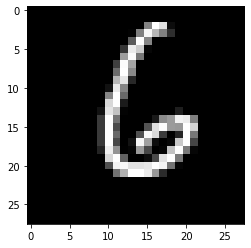

In [5]:
# Loading mnist dataset of characters to use as test images for reconstruction
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train=x_train.astype("float32")/255.0
x_test=x_test.astype("float32")/255.0
plt.imshow(x_train[32],cmap='gray')

### A) Reconstruction (no noise)

(-0.5, 58.5, 58.5, -0.5)

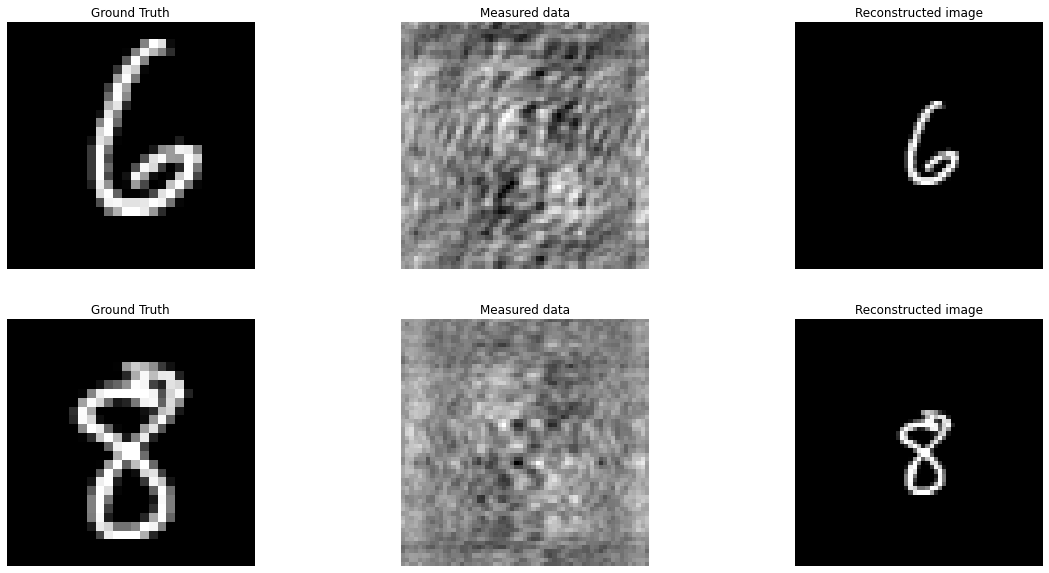

In [6]:
plt.rcParams['figure.figsize'] = [20, 10]

# Step 1 generate projected pattern
imagey = x_train[32];
g=signal.convolve2d(t,imagey, mode='same',boundary='wrap');
plt.subplot(2,3,1);
plt.imshow(imagey,cmap='gray')
plt.title('Ground Truth');
plt.axis('off')
plt.subplot(2,3,2);
plt.imshow(g,cmap='gray')
plt.title('Measured data');
plt.axis('off')
plt.subplot(2,3,3);
fe=signal.convolve2d(ht,g, mode='same',boundary='wrap');
plt.imshow(fe, cmap='gray');
plt.title('Reconstructed image');
plt.axis('off')

# Doing the above process again on a second image 
imagey = x_train[46];
g=signal.convolve2d(t,imagey, mode='same',boundary='wrap');
plt.subplot(2,3,4);
plt.imshow(imagey,cmap='gray')
plt.title('Ground Truth');
plt.axis('off')
plt.subplot(2,3,5);
plt.imshow(g,cmap='gray')
plt.title('Measured data');
plt.axis('off')
plt.subplot(2,3,6);
fe=signal.convolve2d(ht,g, mode='same',boundary='wrap');
plt.imshow(fe, cmap='gray');
plt.title('Reconstructed image');
plt.axis('off')

### B) Reconstruction (100 photons per pixel)




(-0.5, 58.5, 58.5, -0.5)

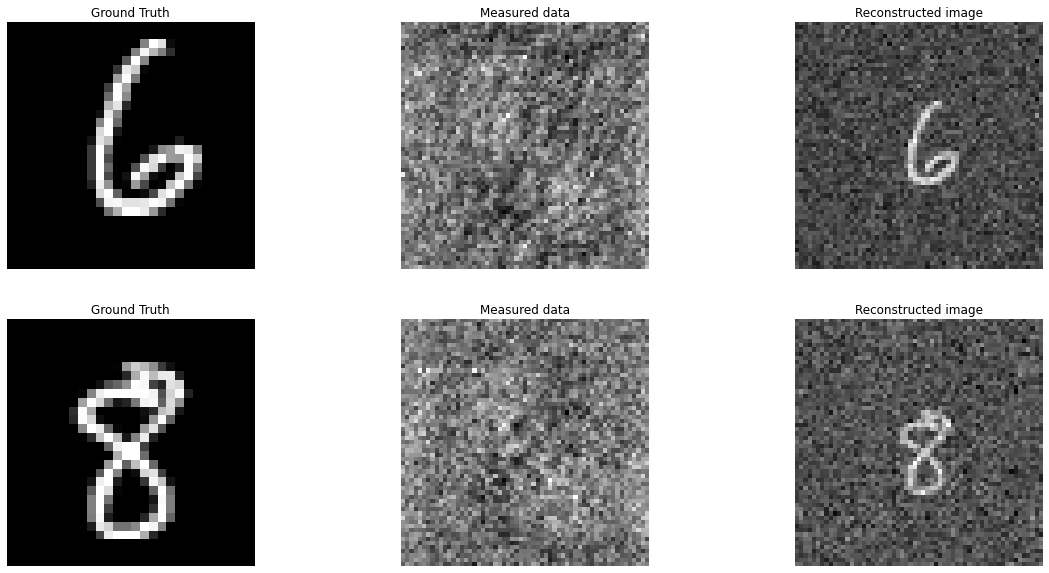

In [7]:
plt.rcParams['figure.figsize'] = [20, 10]

# Step 1 generate projected pattern
imagey = x_train[32];
g=signal.convolve2d(t,imagey, mode='same',boundary='wrap');
photonsPerPixel=100
g=np.random.poisson(photonsPerPixel*g/np.max(g))
plt.subplot(2,3,1);
plt.imshow(imagey,cmap='gray')
plt.title('Ground Truth');
plt.axis('off')
plt.subplot(2,3,2);
plt.imshow(g,cmap='gray')
plt.title('Measured data');
plt.axis('off')
plt.subplot(2,3,3);
fe=signal.convolve2d(ht,g, mode='same',boundary='wrap');
plt.imshow(fe, cmap='gray');
plt.title('Reconstructed image');
plt.axis('off')

# Doing the above process again on a second image 
imagey = x_train[46];
g=signal.convolve2d(t,imagey, mode='same',boundary='wrap');
photonsPerPixel=100
g=np.random.poisson(photonsPerPixel*g/np.max(g))
plt.subplot(2,3,4);
plt.imshow(imagey,cmap='gray')
plt.title('Ground Truth');
plt.axis('off')
plt.subplot(2,3,5);
plt.imshow(g,cmap='gray')
plt.title('Measured data');
plt.axis('off')
plt.subplot(2,3,6);
fe=signal.convolve2d(ht,g, mode='same',boundary='wrap');
plt.imshow(fe, cmap='gray');
plt.title('Reconstructed image');
plt.axis('off')

### C) Reconstruction (10 photons per pixel)

(-0.5, 58.5, 58.5, -0.5)

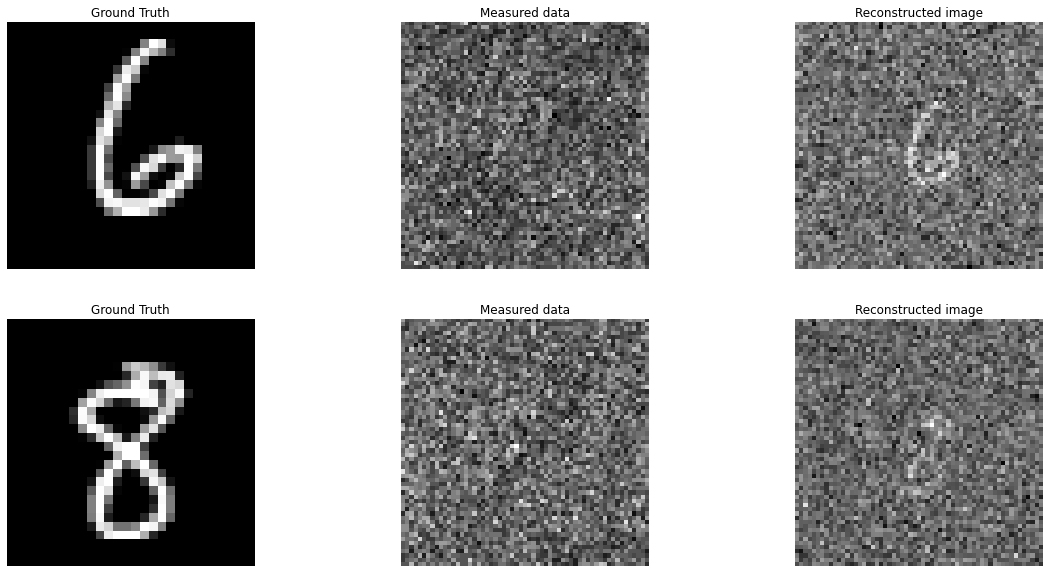

In [8]:
plt.rcParams['figure.figsize'] = [20, 10]

# Step 1 generate projected pattern
imagey = x_train[32];
g=signal.convolve2d(t,imagey, mode='same',boundary='wrap');
photonsPerPixel=10
g=np.random.poisson(photonsPerPixel*g/np.max(g))
plt.subplot(2,3,1);
plt.imshow(imagey,cmap='gray')
plt.title('Ground Truth');
plt.axis('off')
plt.subplot(2,3,2);
plt.imshow(g,cmap='gray')
plt.title('Measured data');
plt.axis('off')
plt.subplot(2,3,3);
fe=signal.convolve2d(ht,g, mode='same',boundary='wrap');
plt.imshow(fe, cmap='gray');
plt.title('Reconstructed image');
plt.axis('off')

# Doing the above process again on a second image 
imagey = x_train[46];
g=signal.convolve2d(t,imagey, mode='same',boundary='wrap');
photonsPerPixel=10
g=np.random.poisson(photonsPerPixel*g/np.max(g))
plt.subplot(2,3,4);
plt.imshow(imagey,cmap='gray')
plt.title('Ground Truth');
plt.axis('off')
plt.subplot(2,3,5);
plt.imshow(g,cmap='gray')
plt.title('Measured data');
plt.axis('off')
plt.subplot(2,3,6);
fe=signal.convolve2d(ht,g, mode='same',boundary='wrap');
plt.imshow(fe, cmap='gray');
plt.title('Reconstructed image');
plt.axis('off')

### D) Discussion

## 2) Neural Denoising of Reconstructed Images

In [26]:
# load the mnist dataset of characters
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train =np.pad(x_train, ((0,0),(14,14),(14,14)), 'constant')
x_test =np.pad(x_test, ((0,0),(14,14),(14,14)), 'constant')
x_train=x_train.astype("float32")/255.0
x_test=x_test.astype("float32")/255.0

print(np.shape(x_test))


(10000, 56, 56)


In [29]:
g_test=np.zeros(np.shape(x_test))
g_train=np.zeros(np.shape(x_train))

pbar1 = ProgressBar()
for pop in pbar1(range(np.shape(x_test)[0])):
  g_test[pop,:,:]=cv2.resize(signal.convolve2d(ht,np.random.poisson(5*signal.convolve2d(t,x_test[pop,:,:], mode='same',boundary='wrap'))\
                                               ,mode='same',boundary='wrap'),dsize=(56,56))
  g_test[pop,:,:]=g_test[pop,:,:]/np.max(g_test[pop,:,:])

pbar2 = ProgressBar()
for pop in pbar2(range(np.shape(x_train)[0])):
  g_train[pop,:,:]=cv2.resize(signal.convolve2d(ht,np.random.poisson(5*signal.convolve2d(t,x_train[pop,:,:], mode='same',boundary='wrap'))\
                                                ,mode='same',boundary='wrap'),dsize=(56,56))
  g_train[pop,:,:]=g_train[pop,:,:]/np.max(g_train[pop,:,:])
x_train = np.reshape(x_train, (len(x_train), 56,56, 1))
x_test = np.reshape(x_test, (len(x_test), 56,56, 1))
g_train = np.reshape(g_train, (len(g_train), 56,56, 1))
g_test = np.reshape(g_test, (len(g_test), 56,56, 1))

100% (10000 of 10000) |##################| Elapsed Time: 0:11:14 Time:  0:11:14
100% (60000 of 60000) |##################| Elapsed Time: 1:08:07 Time:  1:08:07


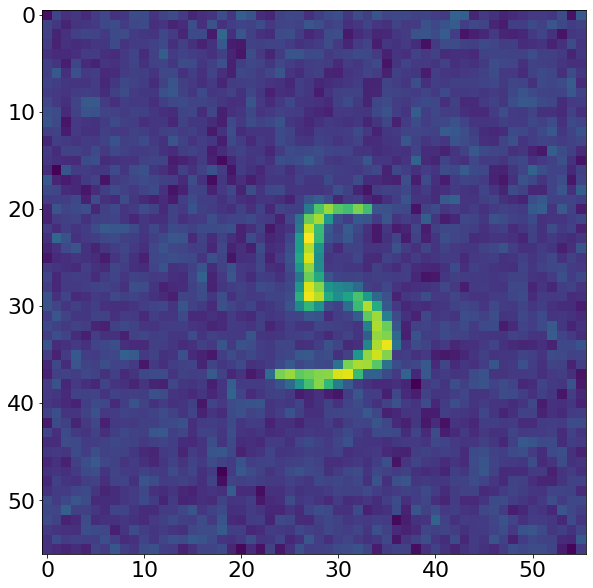

In [30]:
np.save('x_train1', x_train)
np.save('x_test1', x_test)
np.save('g_train1', g_train)
np.save('g_test1', g_test)
plt.imshow(g_test[1931].reshape(56, 56))

### A) Denoising Model #1

#### Layers

In [32]:
input_img = keras.Input(shape=(56, 56, 1))
# we add in four extra layers on top of Dr. Brady's example, now 14 epochs

x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
encoded = layers.MaxPooling2D((2, 2), padding='same')(x)

# At this point the representation is (7, 7, 32)

x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(encoded)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = layers.UpSampling2D((2, 2))(x)
decoded = layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = keras.Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 56, 56, 1)]       0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 56, 56, 32)        320       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 28, 28, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 28, 28, 32)        9248      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 14, 14, 32)        9248      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 7, 7, 32)          0   

#### Training

In [33]:
autoencoder.fit(
    x=g_train,
    y=x_train,
    epochs=14,
    batch_size=128,
    shuffle=True,
    validation_data=(g_test, x_test),
)

Epoch 1/14
469/469 [==============================] - 25s 18ms/step - loss: 0.0618 - val_loss: 0.0323
Epoch 2/14
469/469 [==============================] - 7s 15ms/step - loss: 0.0297 - val_loss: 0.0274
Epoch 3/14
469/469 [==============================] - 7s 14ms/step - loss: 0.0265 - val_loss: 0.0251
Epoch 4/14
469/469 [==============================] - 7s 15ms/step - loss: 0.0248 - val_loss: 0.0238
Epoch 5/14
469/469 [==============================] - 7s 14ms/step - loss: 0.0237 - val_loss: 0.0230
Epoch 6/14
469/469 [==============================] - 7s 14ms/step - loss: 0.0229 - val_loss: 0.0223
Epoch 7/14
469/469 [==============================] - 7s 14ms/step - loss: 0.0223 - val_loss: 0.0220
Epoch 8/14
469/469 [==============================] - 7s 14ms/step - loss: 0.0219 - val_loss: 0.0217
Epoch 9/14
469/469 [==============================] - 7s 14ms/step - loss: 0.0215 - val_loss: 0.0211
Epoch 10/14
469/469 [==============================] - 7s 14ms/step - loss: 0.0212 - val_l

#### Results

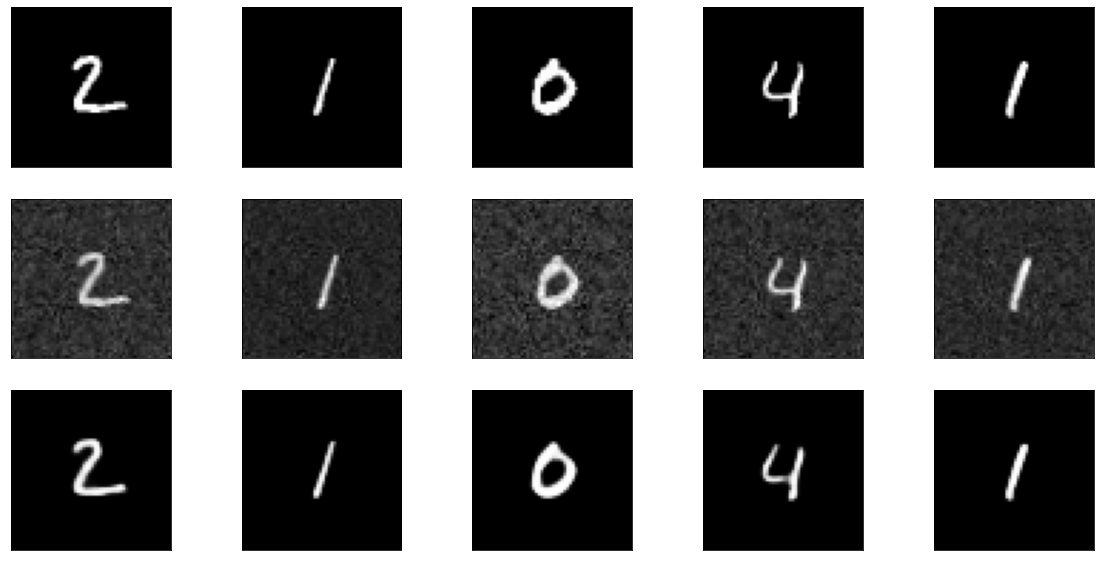

In [34]:
n = 5
plt.figure(figsize=(20, 10))
for i in range(1, n + 1):
    ax = plt.subplot(3, n, i)
    plt.imshow(x_test[i].reshape(56, 56))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    ax = plt.subplot(3, n, n+i)
    plt.imshow(g_test[i].reshape(56, 56))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    ax = plt.subplot(3, n, 2*n+i)
    plt.imshow(autoencoder.predict(g_test[i:i+1,:,:,:])[0,:,:,0])
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

### B) Denoising Model #2

#### Layers

#### Training

#### Results

### C) Discussion